# Q&A Activity Question Week-15
Activity Description:
Jio fibre wants to implement AI/ML in their systems.
The activity task is to build a network intrusion detector,
a predictive model capable of distinguishing between 'bad' connections,
called intrusions or attacks, and 'good'; normal connections.

This database contains a standard set of data to be audited, which
includes a wide variety of intrusions in the network environment.
Your target is building a machine efficient learning model using
probabilistic approach models, probabilities of bad or good
connections using naïve bayes model. This is a multi-class classification.
Fine tune the model and make a model which has at least 97% accuracy.


In [46]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix



In [4]:
data = pd.read_csv('tcp-connection (1).csv')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

# There is no missing values in the dataset

In [7]:
#label encoding
le = LabelEncoder()
data['protocol_type'] = le.fit_transform(data['protocol_type'])
data['service'] = le.fit_transform(data['service'])
data['flag'] = le.fit_transform(data['flag'])

In [9]:
intrusion_unique = data['intrusion'].value_counts()
print('Intrusion types : ', intrusion_unique.shape[0])
print(intrusion_unique.head())

Intrusion types :  23
b'smurf.'      280790
b'neptune.'    107201
b'normal.'      97278
b'back.'         2203
b'satan.'        1589
Name: intrusion, dtype: int64


In [30]:
data['intrusion'] = np.where(data['intrusion'] == "b'normal.'", 0, 1)

In [31]:
data['intrusion'].value_counts()

1    396743
0     97278
Name: intrusion, dtype: int64

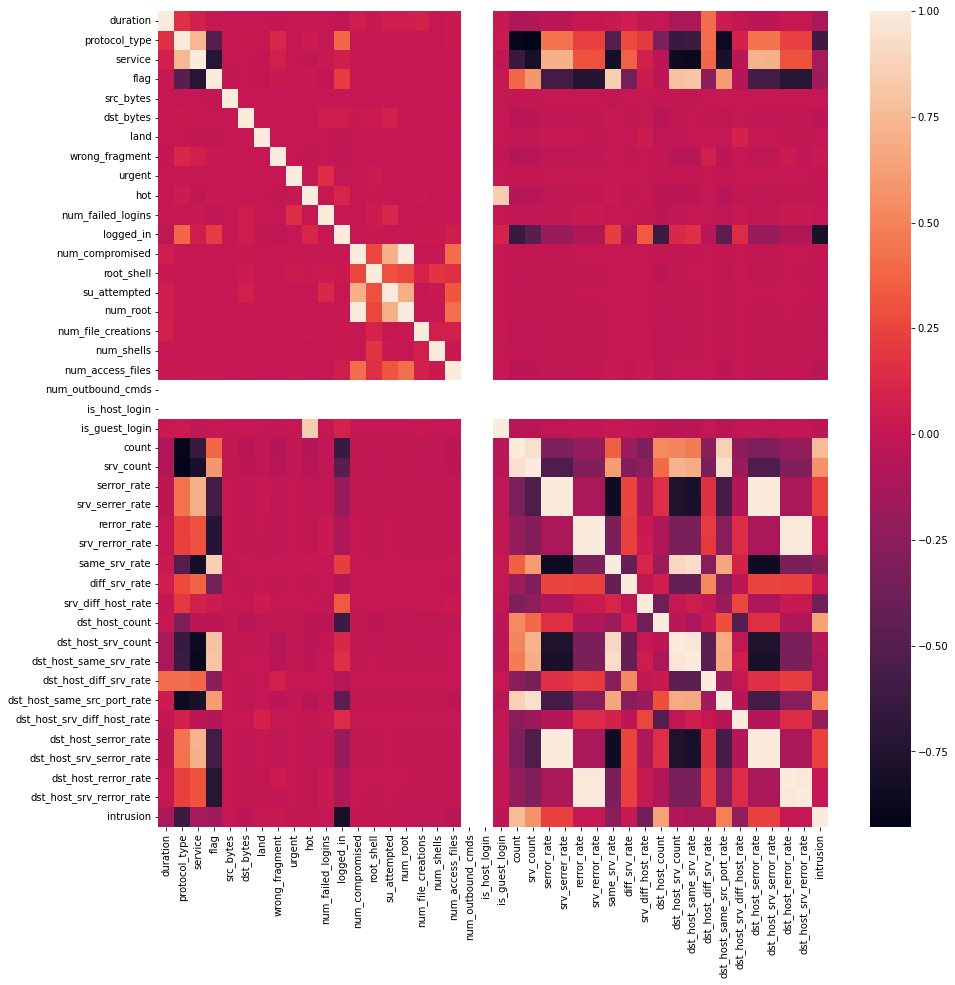

In [32]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix)
plt.show()

In [33]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,2,11,9,44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0
1,0,1,50,9,1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,0
2,0,0,14,9,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1
3,0,0,14,9,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,1
4,0,1,45,5,0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
#defining feature'X' & target'y'
X = data.drop(["intrusion"], axis=1)
y = pd.DataFrame(data["intrusion"])
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,11,9,44,134,0,0,0,0,...,139,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0
1,0,1,50,9,1489,385,0,0,0,0,...,5,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0
2,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
3,0,0,14,9,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
4,0,1,45,5,0,0,0,0,0,0,...,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0


In [36]:
#Scaling using MinMax Scaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
print(X)

[[0.         1.         0.16923077 ... 0.         0.         0.        ]
 [0.         0.5        0.76923077 ... 0.         0.         0.        ]
 [0.         0.         0.21538462 ... 0.         0.         0.        ]
 ...
 [0.         0.5        0.76923077 ... 0.         0.         0.        ]
 [0.         0.5        0.33846154 ... 0.         0.         0.        ]
 [0.         0.5        0.69230769 ... 0.         1.         1.        ]]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [39]:
print("Train data score:", model.score(X_train, y_train))
print("Test data score:", model.score(X_test, y_test))

Train data score: 0.9814126958422736
Test data score: 0.9822174991144172


# Checking accuracy

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print ("Accuracy is {}.".format(round(accuracy,4)))

Accuracy is 0.9822.


In [42]:
#confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

cmat = confusion_matrix(y_test, y_pred)

tot_correct_predictions=0
for i in range(len(cmat)):
    tot_correct_predictions+=cmat[i][i]
    

accuracy = (tot_correct_predictions / np.sum(cmat))*100

print(f'Accuracy  : {accuracy:.2f} %')

Accuracy  : 98.22 %


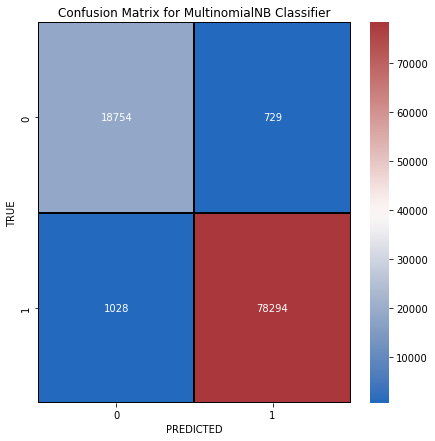

In [44]:
#Confusion Matrix plot 

cmat = confusion_matrix(y_test, y_pred)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cmat, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="vlag", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED")
plt.ylabel("TRUE")
plt.title('Confusion Matrix for MultinomialNB Classifier')

plt.show();

In [47]:
gnb = GaussianNB()
model_1 = gnb.fit(X_train, y_train)
gnb_predict = model_1.predict(X_test)
confusion_matrix(y_test, gnb_predict)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[19248,   235],
       [ 1141, 78181]], dtype=int64)

In [51]:
accuracy_score(y_test, gnb_predict)*100

98.6073579272304

In [50]:
bnb = BernoulliNB()
model_2 = bnb.fit(X_train, y_train)
bnb_predict = model_2.predict(X_test)
confusion_matrix(y_test, bnb_predict)
accuracy_score(y_test, bnb_predict)*100

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


98.05273012499367

In [54]:
X = data.drop('intrusion', axis =1)
y = data['intrusion']
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mnb = MultinomialNB()
model_3 = mnb.fit(X_train, y_train)
mnb_predict = model_3.predict(X_test)
confusion_matrix(y_test, mnb_predict)
accuracy_score(y_test, mnb_predict)*100

98.22174991144172

In [ ]:
# The GaussianNB with an accuracy of 98.61 is the best model